### Data Pipeline
We are going to follow the below steps in our analysis:

1 Importing Libraries

2 Loading Dataset

3 Explore Data

a. Perform data cleaning, handle missing values, outliers, and inconsistencies.

b.Conduct EDA to understand the structure, patterns, and relationships in the data. Visualize the data using plots and graphs to gain insights.


#### Importing libraries for Data Manipulation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset into Jupyter

In [2]:
df = pd.read_csv("D:\\Data sets\\Ecommerce.csv", encoding='latin1')

In [3]:
df.head()# will display the dataframe of 1st 5 rows of the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [4]:
df.tail() # will display the dataframe of lastt 5 rows of the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,07-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,07-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,07-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,07-Dec-17,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,07-Dec-17,4.95,12680.0,France


In [5]:
df.shape  # will display the number of rows and columns

(541909, 8)

In [6]:
df.columns # to get to know about the columns name 

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info() #method provides a concise summary of the data, including the number of rows, columns, non-null values, and the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Dealing with Dtypes

In [8]:
df.dtypes 

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### 1. "invoice_date" to datetime dtype

In [9]:
df["Invoice_date"] = pd.to_datetime(df['InvoiceDate'], format='%d-%b-%y')

In [10]:
df['Day'] = df['Invoice_date'].dt.day 
df['Month'] = df['Invoice_date'].dt.month

#### 2. "description" to all lower caps

In [11]:
df["Description"] = df["Description"].str.lower()

In [12]:
df[["Description","Invoice_date"]].head()

,Description,Invoice_date
0,white hanging heart t-light holder,2016-11-29
1,white metal lantern,2016-11-29
2,cream cupid hearts coat hanger,2016-11-29
3,knitted union flag hot water bottle,2016-11-29
4,red woolly hottie white heart.,2016-11-29


#### 3. "customer_id" to int64 dtype

In [13]:
df["CustomerID"] = pd.to_numeric(df["CustomerID"], errors="coerce").astype("Int64")
df.CustomerID.dtype

Int64Dtype()

In [14]:
df.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate             object
UnitPrice              float64
CustomerID               Int64
Country                 object
Invoice_date    datetime64[ns]
Day                      int64
Month                    int64
dtype: object

### Removing "quantity" with negative values

In [15]:
df = df[df["Quantity"]>0]

In [16]:
df["Quantity"]

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 531285, dtype: int64

#### Adding New Column for Revenue/Amount Spent

In [17]:
df['Amount_spent'] = df["UnitPrice"]*df["Quantity"]

In [18]:
df.count() #It is used to count the number of non-null values in each column of a DataFrame or dataset.

InvoiceNo       531285
StockCode       531285
Description     530693
Quantity        531285
InvoiceDate     531285
UnitPrice       531285
CustomerID      397924
Country         531285
Invoice_date    531285
Day             531285
Month           531285
Amount_spent    531285
dtype: int64

In [19]:
## let's identify whether the data contains any duplicated values or not.
## if it contains then we have to remove those values (row).

df[df.duplicated()] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_date,Day,Month,Amount_spent
517,536409,21866,union jack flag luggage tag,1,29-Nov-16,1.25,17908,United Kingdom,2016-11-29,29,11,1.25
527,536409,22866,hand warmer scotty dog design,1,29-Nov-16,2.10,17908,United Kingdom,2016-11-29,29,11,2.10
537,536409,22900,set 2 tea towels i love london,1,29-Nov-16,2.95,17908,United Kingdom,2016-11-29,29,11,2.95
539,536409,22111,scottie dog hot water bottle,1,29-Nov-16,4.95,17908,United Kingdom,2016-11-29,29,11,4.95
555,536412,22327,round snack boxes set of 4 skulls,1,29-Nov-16,2.95,17920,United Kingdom,2016-11-29,29,11,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,black pirate treasure chest,1,07-Dec-17,0.39,14446,United Kingdom,2017-12-07,7,12,0.39
541689,581538,23318,box of 6 mini vintage crackers,1,07-Dec-17,2.49,14446,United Kingdom,2017-12-07,7,12,2.49
541692,581538,22992,revolver wooden ruler,1,07-Dec-17,1.95,14446,United Kingdom,2017-12-07,7,12,1.95
541699,581538,22694,wicker star,1,07-Dec-17,2.10,14446,United Kingdom,2017-12-07,7,12,2.10


In [20]:
duplicate_count = df[df.duplicated()].shape[0]
print("Number of duplicated rows: ", duplicate_count)

Number of duplicated rows:  5232


In [21]:
df.drop_duplicates(inplace= True) # This code will remove any duplicated rows from the DataFrame 

In [22]:
df[df.duplicated()] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_date,Day,Month,Amount_spent


#### The specific statistical measures included in the summary can vary, but commonly include:
.Count: The number of non-null values in each column.

.Mean: The average value of each column.

.Standard deviation: A measure of the dispersion or variability in each column.

.Minimum: The minimum value in each column.

.25th percentile: The value below which 25% of the data falls.

.50th percentile (median): The value below which 50% of the data falls.

.75th percentile: The value below which 75% of the data falls.

.Maximum: The maximum value in each column.

In [23]:
df[['Quantity', 'Amount_spent']].describe()

,Quantity,Amount_spent
count,526053.000000,526053.000000
mean,10.730890,20.188047
std,157.591987,272.250558
min,1.000000,-11062.060000
25%,1.000000,3.900000
50%,4.000000,9.920000
75%,11.000000,17.700000
max,80995.000000,168469.600000


### Quantity:

The average quantity purchased is approximately 10.73 units.

The quantity values have a standard deviation of around 157.59, indicating a relatively large variation in the data.

The minimum quantity is 1 unit, indicating that at least one unit was purchased in each transaction.

25% of the data points have a quantity of 1 or less.

Half of the data points have a quantity of 4 or less.

75% of the data points have a quantity of 11 or less.

The maximum quantity observed is 80,995 units.

### Amount_spent:

The average amount spent is approximately $20.19.

The amount_spent values have a standard deviation of around $272.25, indicating a relatively large variation in the data.

The minimum amount spent is -$11,062.06, which may indicate a data entry error or refund situation.

25% of the data points have an amount spent of $3.90 or less.

Half of the data points have an amount spent of $9.92 or less.

75% of the data points have an amount spent of $17.70 or less.

The maximum amount spent is $168,469.60.





# Exploratory Data Analysis

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_date,Day,Month,Amount_spent
0,536365,85123A,white hanging heart t-light holder,6,29-Nov-16,2.55,17850,United Kingdom,2016-11-29,29,11,15.30
1,536365,71053,white metal lantern,6,29-Nov-16,3.39,17850,United Kingdom,2016-11-29,29,11,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,29-Nov-16,2.75,17850,United Kingdom,2016-11-29,29,11,22.00
3,536365,84029G,knitted union flag hot water bottle,6,29-Nov-16,3.39,17850,United Kingdom,2016-11-29,29,11,20.34
4,536365,84029E,red woolly hottie white heart.,6,29-Nov-16,3.39,17850,United Kingdom,2016-11-29,29,11,20.34


In [25]:
df.isnull().sum() # calculate the sum of null values for each column

InvoiceNo            0
StockCode            0
Description        592
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      133322
Country              0
Invoice_date         0
Day                  0
Month                0
Amount_spent         0
dtype: int64

In [26]:
#Removing the null values

df = df.dropna().reset_index(drop=True)

### Missing values treatment
The three common methods for treating missing values:

1.Delete the Observation (row): This method involves removing rows that contain missing values using the dropna() method. It can be a straightforward approach, but it may result in a loss of data.

2.Remove the Column: Similarly, you can delete the entire column that contains missing values using the dropna() method with the axis=1 parameter. However, this approach should be used with caution, as it may lead to the loss of important information.

3.Filling with Mean, Median, or Mode: This method involves filling missing values with summary statistics such as the mean, median, or mode using the fillna() method. It provides a simple way to handle missing values while preserving the general characteristics of the dataset. The choice of statistic depends on the type of data: mean or median for numerical data and mode for categorical data.

#### 1. Deleting rows containing null values.

In [27]:
df_copy = pd.DataFrame(df) # duplicate copy of original dataset

In [28]:
# drop rows of null values

df_copy.dropna(axis = 0,inplace = True) # inplace is used for to apply the dataframe

In [29]:
# check the number of non-empty rows
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392731 entries, 0 to 392730
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392731 non-null  object        
 1   StockCode     392731 non-null  object        
 2   Description   392731 non-null  object        
 3   Quantity      392731 non-null  int64         
 4   InvoiceDate   392731 non-null  object        
 5   UnitPrice     392731 non-null  float64       
 6   CustomerID    392731 non-null  Int64         
 7   Country       392731 non-null  object        
 8   Invoice_date  392731 non-null  datetime64[ns]
 9   Day           392731 non-null  int64         
 10  Month         392731 non-null  int64         
 11  Amount_spent  392731 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 36.3+ MB


#### 2. To Delete Column for null values

In [30]:
df_copy2 = pd.DataFrame(df) # duplicate copy of original dataset

In [31]:
# taking axis = 1  for columns.

df_copy2.dropna(axis=1,inplace=True)

In [32]:
# lets check if there exist any null value.
df_copy2.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
Invoice_date    0
Day             0
Month           0
Amount_spent    0
dtype: int64

### After Dealing with the missing values we proceed further with the df dataframe for our analysis.

#### Multivariate Analysis

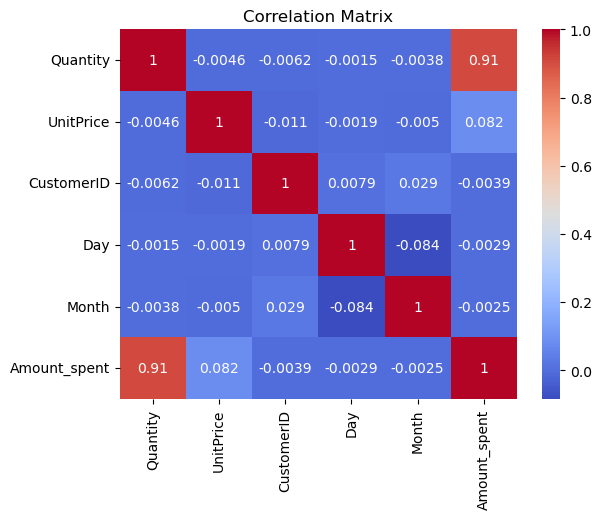

In [33]:
# Heatmap of correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Top Customers with Most Orders Placed

In [34]:
cust_orders=df[["InvoiceNo","CustomerID","Country"]]
cust_orders.head()

,InvoiceNo,CustomerID,Country
0,536365,17850,United Kingdom
1,536365,17850,United Kingdom
2,536365,17850,United Kingdom
3,536365,17850,United Kingdom
4,536365,17850,United Kingdom


In [35]:
cust_orders = df.groupby(by=['CustomerID'], as_index=False)["InvoiceNo"].count().sort_values(by='InvoiceNo', ascending=False).head(20)

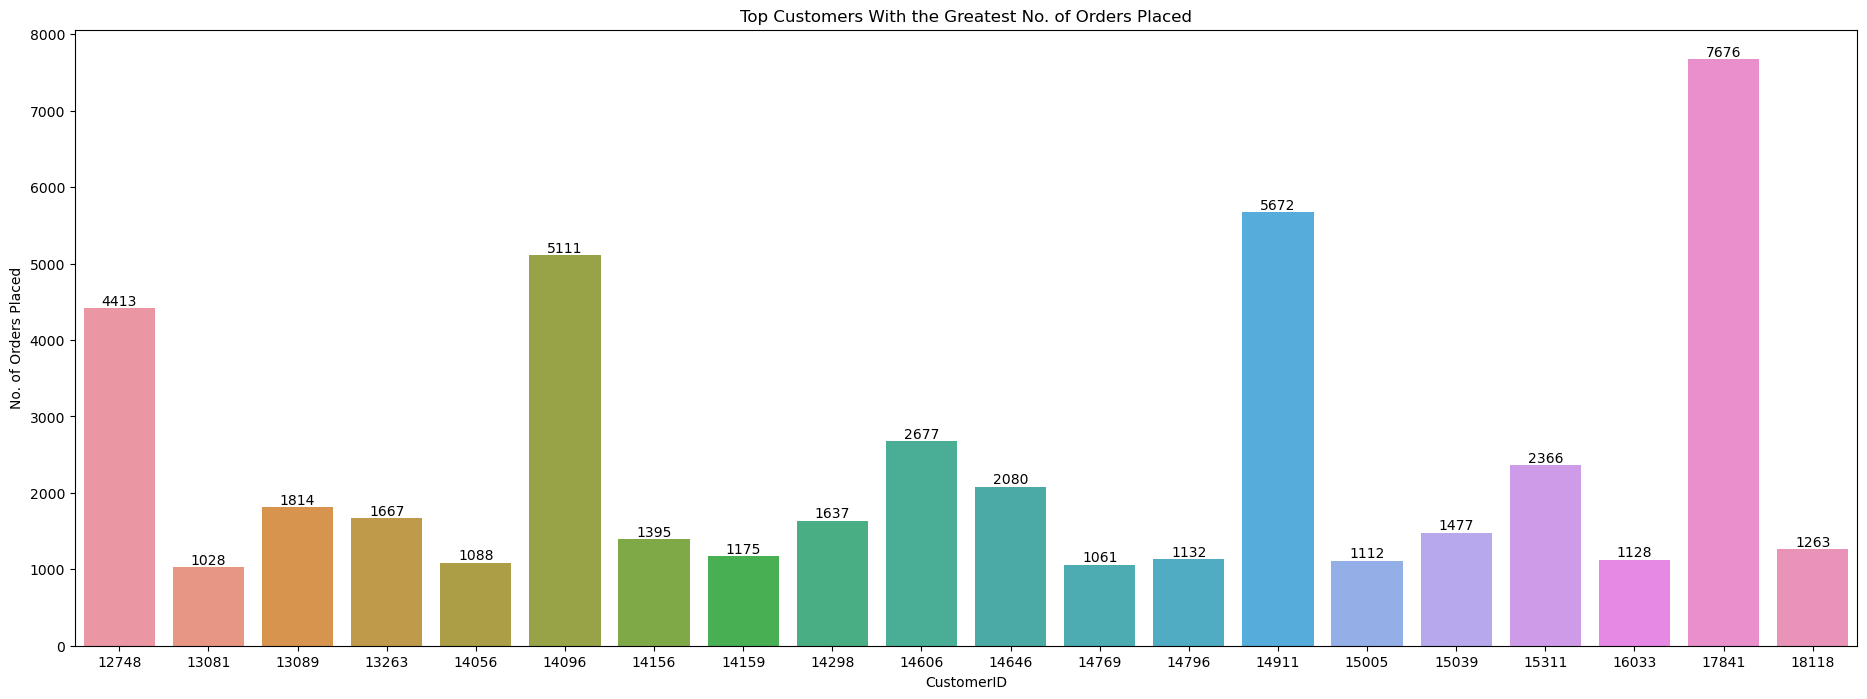

In [36]:
x = cust_orders["CustomerID"]
y = cust_orders["InvoiceNo"]

plt.figure(figsize=(23, 8))
ax = sns.barplot(x, y)

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel("CustomerID")
plt.ylabel("No. of Orders Placed")
plt.title("Top Customers With the Greatest No. of Orders Placed")
plt.show()

#### Top Countries with the Most Orders Placed

In [37]:
country_orders = df[["Country","InvoiceNo"]]
country_orders.head()

,Country,InvoiceNo
0,United Kingdom,536365
1,United Kingdom,536365
2,United Kingdom,536365
3,United Kingdom,536365
4,United Kingdom,536365


In [38]:
country_orders = df.groupby("Country")["InvoiceNo"].count().reset_index()
country_orders = country_orders.sort_values("InvoiceNo", ascending=False).head(15)

In [39]:
country_orders

,Country,InvoiceNo
35,United Kingdom,349226
14,Germany,9027
13,France,8327
10,EIRE,7228
30,Spain,2480
23,Netherlands,2363
3,Belgium,2031
32,Switzerland,1842
26,Portugal,1453
0,Australia,1184


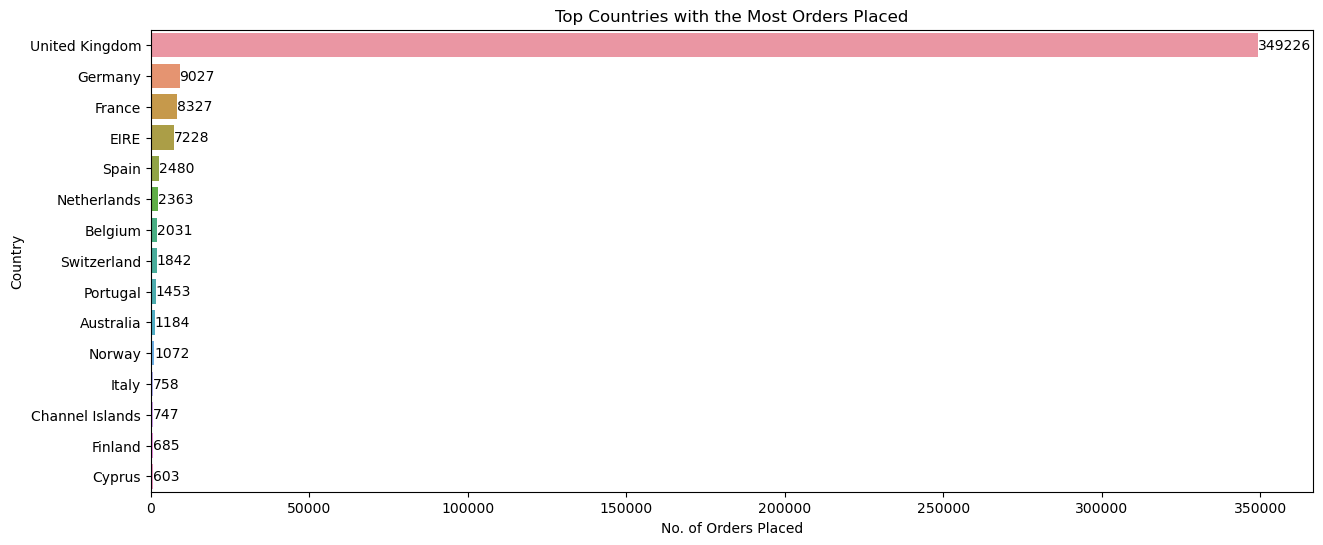

In [40]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="InvoiceNo", y="Country", data=country_orders)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel("No. of Orders Placed")
plt.ylabel("Country")
plt.title("Top Countries with the Most Orders Placed")
plt.show()

#### Top Customers with the Greatest Spending

In [41]:
cust_spent = df[["CustomerID","Amount_spent"]]
cust_spent.head()

,CustomerID,Amount_spent
0,17850,15.30
1,17850,20.34
2,17850,22.00
3,17850,20.34
4,17850,20.34


In [42]:
customer_spent = df.groupby("CustomerID")["Amount_spent"].count().reset_index()
customer_spent = cust_spent.sort_values("Amount_spent", ascending=False).head(20)

In [43]:
customer_spent

,CustomerID,Amount_spent
392265,16446,168469.60
36527,12346,77183.60
153601,15098,38970.00
116879,16029,8142.75
246061,17450,7144.72
108215,15749,6539.40
32204,15749,6539.40
304648,14646,4992.00
32202,15749,4921.50
108211,15749,4632.00


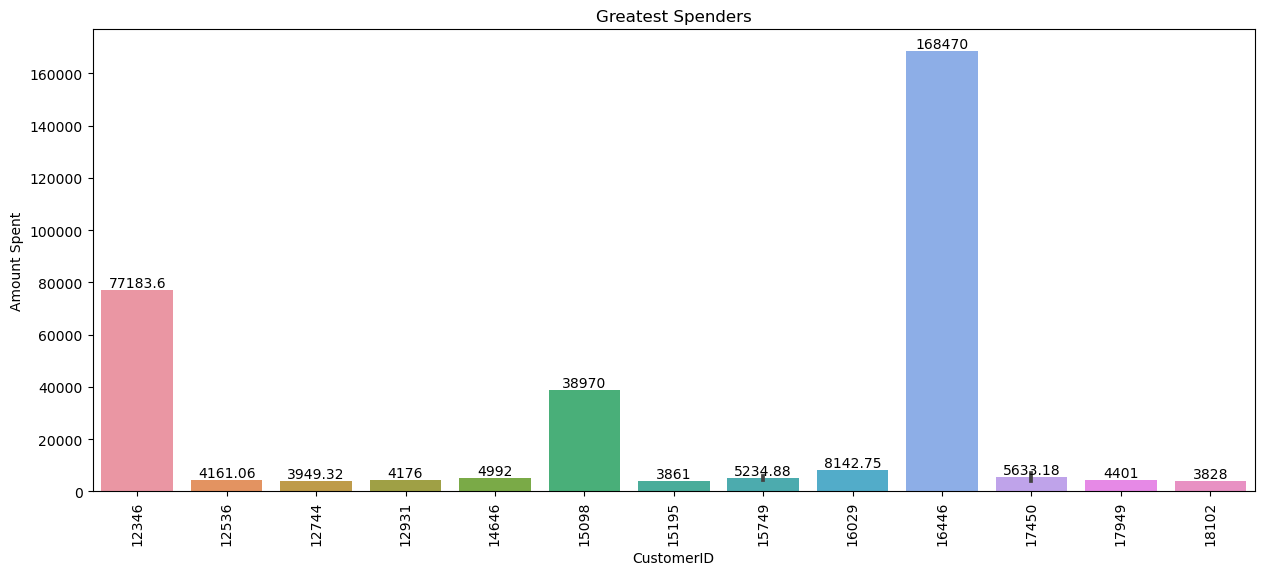

In [44]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="CustomerID", y="Amount_spent", data=customer_spent)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel("CustomerID")
plt.ylabel("Amount Spent")
plt.title("Greatest Spenders")
plt.xticks(rotation=90)
plt.show()

#### Top Countries with the Greatest Spending

In [45]:
country_spend = df[["Country","Amount_spent"]]
country_spend.head()

,Country,Amount_spent
0,United Kingdom,15.30
1,United Kingdom,20.34
2,United Kingdom,22.00
3,United Kingdom,20.34
4,United Kingdom,20.34


In [46]:
country_spend = df.groupby("Country")["Amount_spent"].count().reset_index()
country_spend = country_spend.sort_values("Amount_spent", ascending=False).head(15)

In [47]:
country_spend

,Country,Amount_spent
35,United Kingdom,349226
14,Germany,9027
13,France,8327
10,EIRE,7228
30,Spain,2480
23,Netherlands,2363
3,Belgium,2031
32,Switzerland,1842
26,Portugal,1453
0,Australia,1184


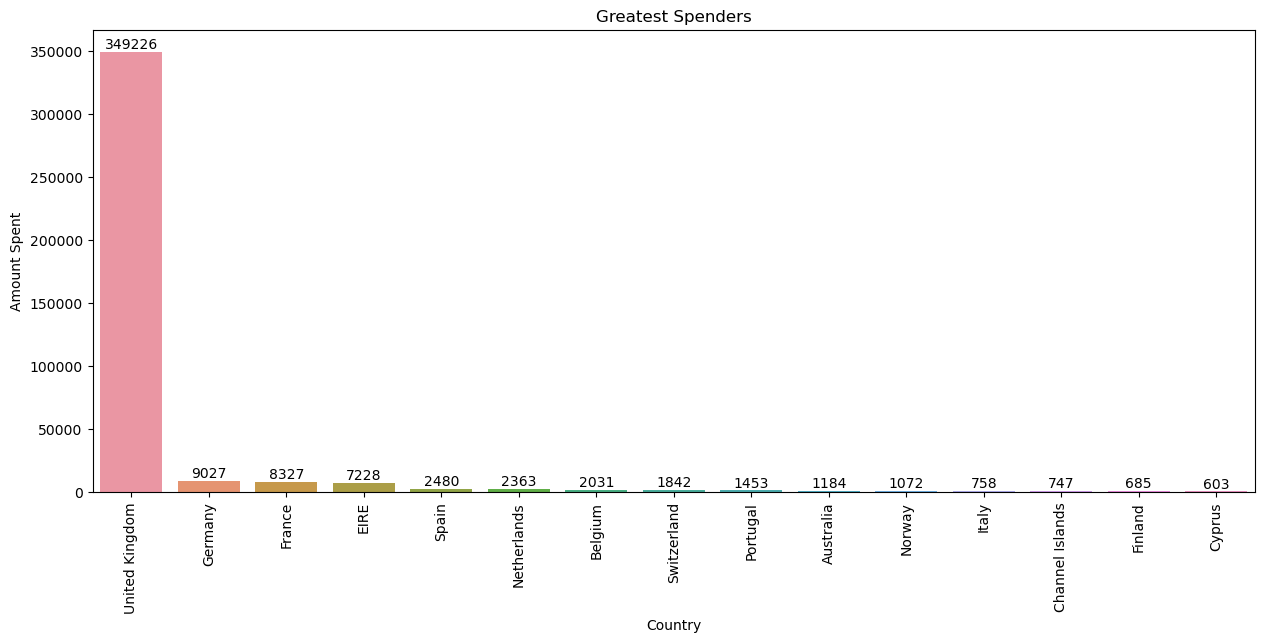

In [48]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(x="Country", y="Amount_spent", data=country_spend)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel("Country")
plt.ylabel("Amount Spent")
plt.title("Greatest Spenders")
plt.xticks(rotation=90)
plt.show()

### How many orders (per month)?

In [49]:
year_month = df.groupby("Month")["InvoiceNo"].nunique().reset_index()
year_month = year_month.sort_values("InvoiceNo", ascending=False)

In [50]:
year_month

,Month,InvoiceNo
10,11,2989
9,10,2054
11,12,1688
8,9,1650
4,5,1616
6,7,1369
5,6,1356
7,8,1341
2,3,1291
0,1,1101


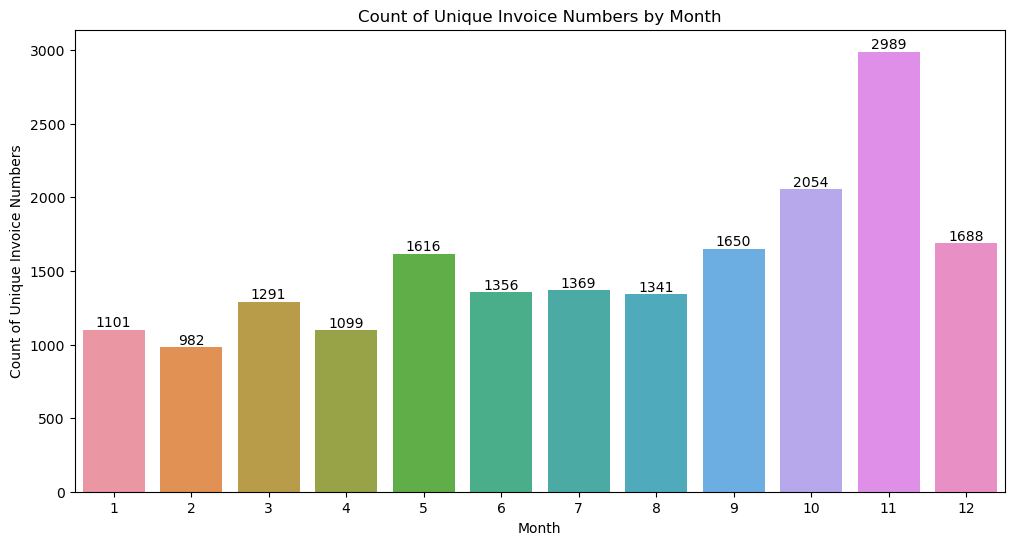

In [51]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x="Month", y="InvoiceNo", data=year_month)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel("Month")
plt.ylabel("Count of Unique Invoice Numbers")
plt.title("Count of Unique Invoice Numbers by Month")
plt.show()

### How many orders (per day)?

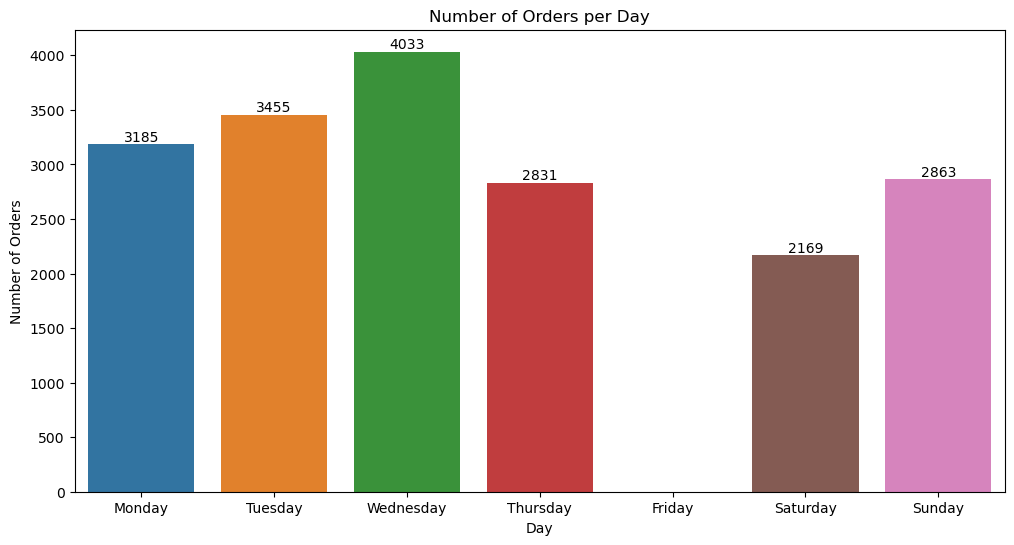

In [52]:
import datetime

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['DayName'] = df['Invoice_date'].dt.strftime('%A')

day_orders = df.groupby('DayName')['InvoiceNo'].nunique().reindex(day_names).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='DayName', y='InvoiceNo', data=day_orders)

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day')

plt.show()

# Perform RFM analysis:

In [53]:
#understanding/findin out each customers rec , freq and monetary values



#recenccy

day = pd.to_datetime('7-Dec-2017')

recency=df.groupby(["CustomerID"]).agg({"Invoice_date":lambda x:((day-x.max()).days)})


In [54]:
recency.head(10)

,Invoice_date
CustomerID,
12346,325
12347,2
12348,75
12349,18
12350,310
12352,36
12353,204
12354,232
12355,214


In [55]:
#frequency

frequency = df.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()

In [56]:
frequency

,InvoiceNo
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1
...,...
18280,1
18281,1
18282,2


In [57]:
# Monetary

monetary = df.groupby(["CustomerID"])[["Amount_spent"]].sum()

In [58]:
monetary

,Amount_spent
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
18280,180.60
18281,80.82
18282,178.05


In [59]:
RFM=pd.concat([recency,frequency,monetary], axis=1)
RFM.columns = ["Recency", "Frequency", "Monetary"]

In [60]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05


#### Standardize the RFM values:

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

#### Apply K-means clustering to segment customers:

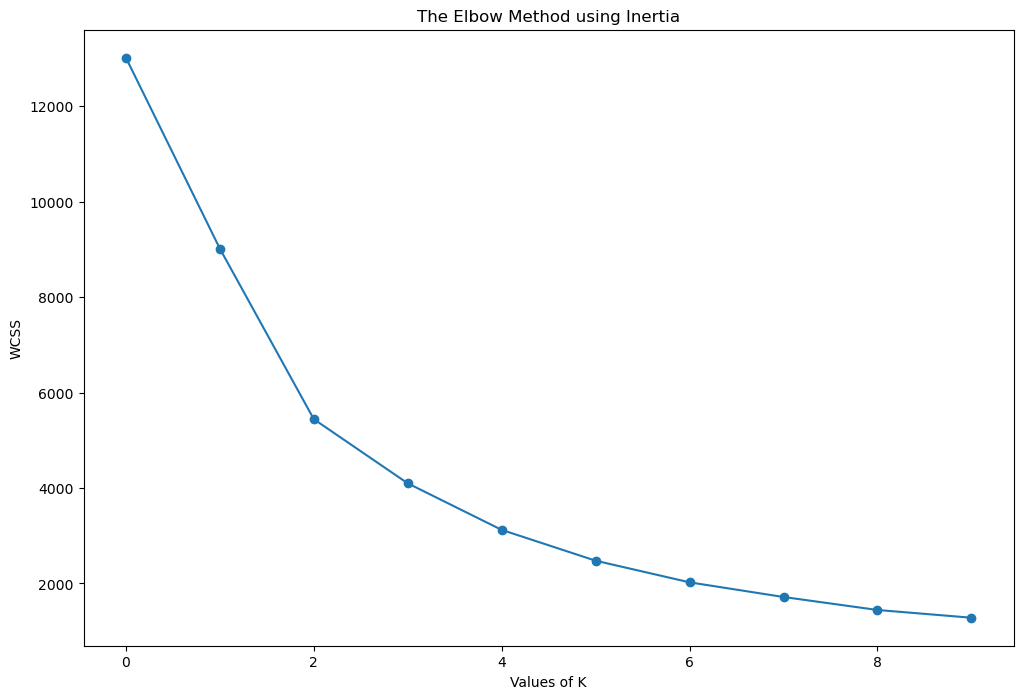

In [62]:
from sklearn.cluster import KMeans

wcss=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(wcss, marker="o")
plt.xlabel('Values of K') 
plt.ylabel('WCSS') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [63]:
from kneed import KneeLocator

In [64]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

4

In [65]:
kmeans=KMeans(n_clusters=4,init="k-means++")
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [66]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346,325,1,77183.60,4
12347,2,7,4310.00,1
12348,75,4,1797.24,1
12349,18,1,1757.55,1
12350,310,1,334.40,2
...,...,...,...,...
18280,277,1,180.60,2
18281,180,1,80.82,2
18282,7,2,178.05,1


In [67]:
final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()
final

,Recency,Frequency,Monetary
Clusters,,,
1,43.477079,3.655206,1343.968839
2,248.173421,1.551367,476.416024
3,6.615385,82.692308,127187.959231
4,15.123223,22.047393,12435.086682


### Interpretations


Cluster 1 represents moderately active customers who make purchases at a moderate frequency and have moderate spending levels.

Cluster 2 represents highly active and high-value customers who make frequent purchases and have significantly higher spending levels.

Cluster 3 represents less active and lower-value customers who make infrequent purchases and have lower spending levels.

In [68]:
def func(row):
    if row["Clusters"]==1:
        return 'Whales'
    elif row["Clusters"]==2:
        return 'Lapsed Cx'
    elif row["Clusters"] == 3:
        return 'Avg. Cx'
    else:
        return 'Standard.cx'

In [69]:
RFM['group']=RFM.apply(func, axis=1)

In [70]:
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346,325,1,77183.60,4,Standard.cx
12347,2,7,4310.00,1,Whales
12348,75,4,1797.24,1,Whales
12349,18,1,1757.55,1,Whales
12350,310,1,334.40,2,Lapsed Cx
...,...,...,...,...,...
18280,277,1,180.60,2,Lapsed Cx
18281,180,1,80.82,2,Lapsed Cx
18282,7,2,178.05,1,Whales


In [71]:
result=RFM.group.value_counts()

In [72]:
result

Whales         3054
Lapsed Cx      1061
Standard.cx     211
Avg. Cx          13
Name: group, dtype: int64

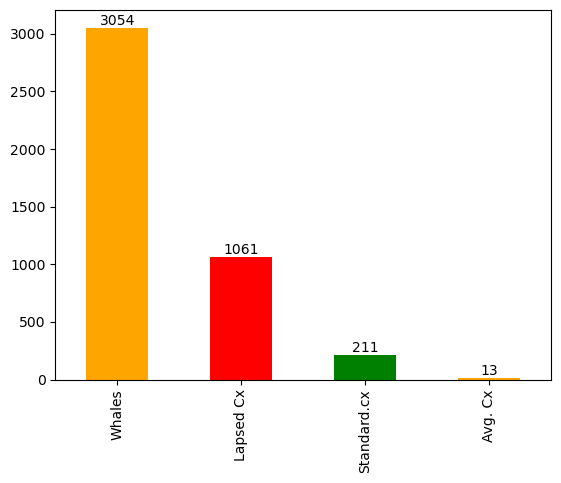

In [73]:
ax=result.plot(kind="bar", color=["Orange","Red","Green"])

for bar in ax.containers:
    ax.bar_label(bar)

### Observations:
    
Whales: There are 3,228 customers classified as "Whales." These customers are high-value and make significant contributions to the company's revenue.

Avg. Cx: There are 1,085 customers classified as "Avg. Cx" or average customers. They have moderate purchasing behavior and contribute to the company's revenue.

Lapsed Cx: There are 26 customers classified as "Lapsed Cx" or lapsed customers. These customers have not made a purchase in a while and require attention to re-engage them.

low Cx: There are 1061 customers classified as "Low Cx" or low cx customers. These customers have not made a purchase in a while and require attention to re-engage them.

# Principal Component Analysis (PCA)

In [74]:
df_copy= df.copy()

In [75]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_date,Day,Month,Amount_spent,DayName
0,536365,85123A,white hanging heart t-light holder,6,29-Nov-16,2.55,17850,United Kingdom,2016-11-29,29,11,15.30,Tuesday
1,536365,71053,white metal lantern,6,29-Nov-16,3.39,17850,United Kingdom,2016-11-29,29,11,20.34,Tuesday
2,536365,84406B,cream cupid hearts coat hanger,8,29-Nov-16,2.75,17850,United Kingdom,2016-11-29,29,11,22.00,Tuesday
3,536365,84029G,knitted union flag hot water bottle,6,29-Nov-16,3.39,17850,United Kingdom,2016-11-29,29,11,20.34,Tuesday
4,536365,84029E,red woolly hottie white heart.,6,29-Nov-16,3.39,17850,United Kingdom,2016-11-29,29,11,20.34,Tuesday


### Feature Engineering

#### Monetary


In [76]:
# Calculate monetary value
df_monetary = df_copy.groupby('CustomerID')['Amount_spent'].sum().reset_index()

# Merge with customer  data
df_copy = df_copy.merge(df_monetary, on='CustomerID', how='left')


#### Recency


In [77]:
# Calculate days from last purchase
df_recency = df_copy.groupby('CustomerID')['Invoice_date'].max().reset_index()
df_recency['recency_days'] = (df_copy['Invoice_date'].max() - df_recency['Invoice_date']).dt.days
df_recency = df_recency[['CustomerID', 'recency_days']].copy()

# Merge with customer data
df_copy = df_copy.merge(df_recency, on='CustomerID', how='left')


#### No. of purchases

In [78]:
df_freq = df_copy.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNO': 'qtde_invoices'})

df_copy = df_copy.merge(df_freq, on='CustomerID', how='left')


#### Total number of products

In [79]:

df_freq = df_copy.groupby('CustomerID')['Quantity'].sum().reset_index().rename(columns={'Quantity': 'qtde_items'})

df_copy = df_copy.merge(df_freq, on='CustomerID', how='left')

df_copy['qtde_items'].fillna(0, inplace=True)


#### Number of types of products

In [80]:
df_freq = (df_copy.loc[:, ['CustomerID', 'StockCode']]
           .groupby('CustomerID')
           .count()
           .reset_index()
           .rename(columns={'StockCode': 'qtde_products'})
          )
df_copy = pd.merge(df_copy, df_freq, on='CustomerID', how='left')
df_copy['qtde_products'].fillna(0, inplace=True)



#### Average recency days

In [81]:
df_avg_recency_days = df_copy.groupby('CustomerID')['Invoice_date'].apply(lambda x: x.diff().dt.days.mean())
df_avg_recency_days = df_avg_recency_days.to_frame(name='avg_recency_days').reset_index()

df_copy = pd.merge(df_copy, df_avg_recency_days, on='CustomerID', how='left')


#### Purchase Frequency

In [82]:
df_freq = df_copy.groupby('CustomerID')['Invoice_date'].nunique().reset_index().rename(columns={'Invoice_date': 'buy_'})

df_dates = df_copy.groupby('CustomerID')['Invoice_date'].agg(['min', 'max']).reset_index()
df_dates['days_'] = (df_dates['max'] - df_dates['min']).dt.days + 1

df_dates['frequency'] = df_freq['buy_'] / df_dates['days_']
df_dates['frequency'].fillna(0, inplace=True)

df_copy = pd.merge(df_copy, df_dates[['CustomerID', 'frequency']], on='CustomerID', how='left')


#### No. of returns

In [83]:
df_returns = df_copy.loc[df_copy['Quantity'] < 0, ['CustomerID', 'Quantity']].groupby('CustomerID').sum().reset_index().rename(columns={'Quantity': 'qtde_returns'})
df_returns['qtde_returns'] *= -1

df_copy = pd.merge(df_copy, df_returns, on='CustomerID', how='left')
df_copy['qtde_returns'].fillna(0, inplace=True)


In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
df_copy.columns

Index(['InvoiceNo_x', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_date', 'Day', 'Month',
       'Amount_spent_x', 'DayName', 'Amount_spent_y', 'recency_days',
       'InvoiceNo_y', 'qtde_items', 'qtde_products', 'avg_recency_days',
       'frequency', 'qtde_returns'],
      dtype='object')

In [86]:
cols_selected = ['Amount_spent_x', 'recency_days', 'InvoiceNo_x', 'qtde_items', 'qtde_products', 'qtde_returns']
df_rfm = df_copy[cols_selected].copy()

In [87]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_rfm)

# PCA

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(rfm_scaled)

In [90]:
pca.components_

array([[ 0.04195865, -0.49109927,  0.2985221 ,  0.55824612,  0.5969144 ,
         0.        ],
       [ 0.12364049,  0.45672302, -0.70051787,  0.4339724 ,  0.3115442 ,
        -0.        ],
       [ 0.98720193, -0.03306345,  0.08762683, -0.01280876, -0.12843919,
         0.        ]])

In [91]:
pca.explained_variance_ratio_

array([0.33270419, 0.23710676, 0.20001553])

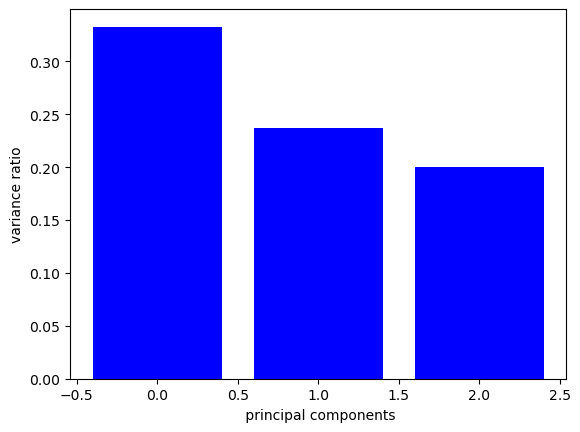

In [92]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color='blue')
plt.xlabel(' principal components')
plt.ylabel("variance ratio")
plt.show()

In [93]:
principal_components

array([[-3.33298124,  3.41847518, -0.31756451],
       [-3.33230145,  3.42047834, -0.30157041],
       [-3.33207755,  3.42113811, -0.29630252],
       ...,
       [ 0.350784  , -1.68148323,  0.20035677],
       [ 0.350784  , -1.68148323,  0.20035677],
       [ 0.35054796, -1.68217877,  0.19480327]])

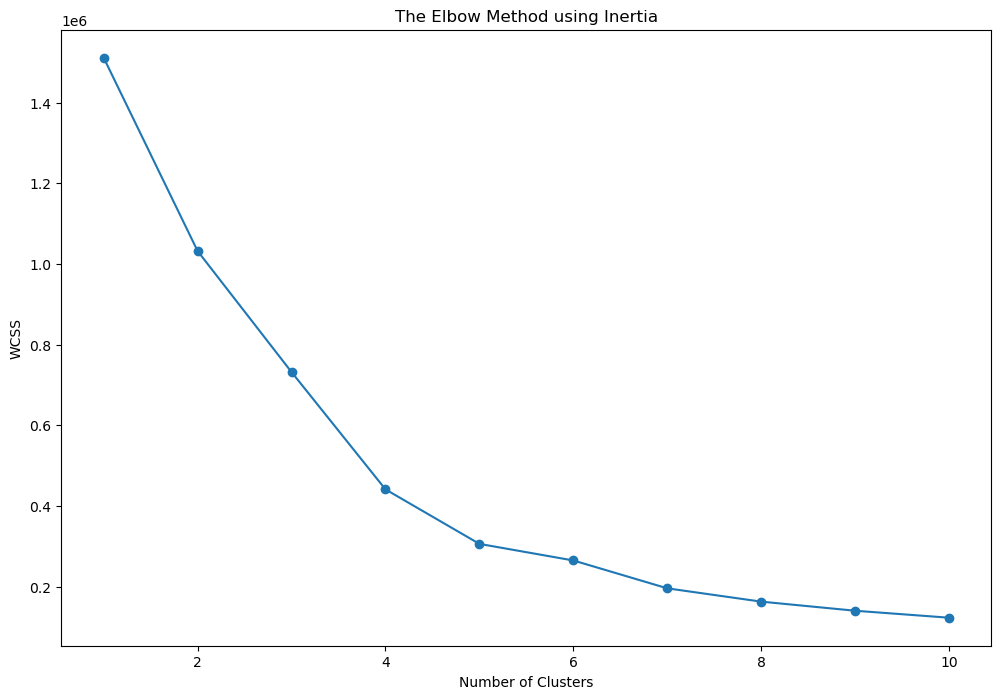

In [94]:
from sklearn.cluster import KMeans

#Perform K-means clustering and determine the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)



# Plot the within-cluster sum of squares (WCSS) for different number of clusters

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method using Inertia')
plt.show()

In [95]:
from kneed import KneeLocator

# Determine the optimal number of clusters using the "elbow" method

knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_num_clusters = knee.elbow

In [96]:
#Perform K-means clustering with the optimal number of clusters

kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
kmeans.fit(principal_components)

KMeans(n_clusters=4, random_state=42)

In [97]:
#Assign cluster labels to the RFM data

df_rfm['Cluster'] = kmeans.labels_

In [98]:
#Analyze the clusters

cluster_analysis = df_rfm.groupby('Cluster').agg({
    'Amount_spent_x': 'mean',
    'recency_days': 'mean',
    'InvoiceNo_x': 'mean',
    'qtde_items': 'mean',
    'qtde_products': 'mean',
    'qtde_returns': 'mean'
}).reset_index()

In [99]:
# Print the cluster analysis

cluster_df = pd.DataFrame(cluster_analysis)

In [100]:
cluster_df

,Cluster,Amount_spent_x,recency_days,InvoiceNo_x,qtde_items,qtde_products,qtde_returns
0,0,19.357230,20.011107,inf,2587.536362,307.149066,0.0
1,1,47.993243,2.551252,inf,50927.490251,4548.958939,0.0
2,2,20.444970,84.826581,inf,2230.668345,245.480063,0.0
3,3,168469.600000,0.000000,581483.0,80997.000000,3.000000,0.0
